You gotta study well, and I am with you always. Just stay happy and at the best of your health. 
I promise over everything, I am always going to be with you, no matter what, I can wait all my life just for you and I mean it. It seems I maybe exaggerating, but who else I am gonna say all these if not you. I just want you and no-one else. 
The emotions present in the reviews are : 
[' happy']
Counter({' happy': 1})
The sentiment is 13.200000000000001% Positive


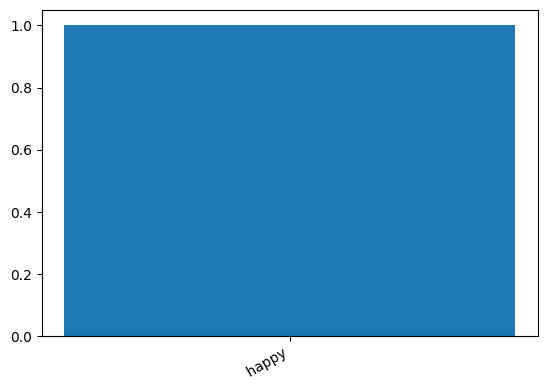

In [5]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#print(string.punctuation)
text=open('user_input.txt',encoding='utf-8').read()
print(text)
lower_case=text.lower()
punc_removed=lower_case.translate(str.maketrans('','',string.punctuation))
#Tokenizing sentences
tokenized_words=word_tokenize(punc_removed,"english")
#print(tokenized_words)

final_words=[]
for i in tokenized_words:
    if i not in stopwords.words('english'):
        final_words.append(i)
#print(final_words)

#emotion anal
emotion_present=[]

with open('emotions.txt','r') as file: 
    for line in file:
        clear_line = line.replace('\n','').replace(',','').replace("'",'').strip()
        word, emotion = clear_line.split(':')
        #print("Word : "+ word + "" + "Emotion : " + emotion)
        #print(clear_line)
        if word in final_words:
            emotion_present.append(emotion)

print("The emotions present in the reviews are : ")
print(emotion_present)
w=Counter(emotion_present)
print(w)

def sentiment_anal(sentiment_text):
    score=SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    #storing the scores of th emotiones present in the text
    neg = score['neg']*100
    pos = score['pos']*100
    neu = score['neu']*100
    if neg>pos:
        print("the sentiment is "+ str(neg) + "% Negative")
    elif pos>neg:
        print("The sentiment is "+ str(pos) + "% Positive")
    else:
        print("The text is "+ str(neu) +"% Neutral")
    #print(score)
#calling the sentiment score 
sentiment_anal(punc_removed)
#graph without auto adjustment
# plt.bar(w.keys(),w.values())
# plt.savefig('graph.png')
# plt.show()

#graph with auto adjustment
fig,ax1 = plt.subplots()
ax1.bar(w.keys(),w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()